# Load Ratings Data

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import pickle
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
%matplotlib inline
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:80% !important; }</style>")) 

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999

In [3]:
cwd = os.getcwd()
ratings = pd.read_csv(os.path.join(cwd, "..", "data", "ratings.csv"))
ratings.drop('timestamp', axis=1, inplace=True)
movies = pd.read_csv(os.path.join(cwd, "..", "data", "movies.csv"))

In [4]:
ratings = pd.merge(left=movies, right=ratings, on='movieId', how="right")

In [5]:
ratings.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5


# Explore Popular and Niche Movies

In [6]:
popularity = pd.DataFrame(ratings[['userId', 'title', 'movieId']].groupby(['title', 'movieId']).agg(['count']))
popularity.reset_index(inplace=True)
popularity.columns = ['title', 'movieId', 'ratings_count']
popularity.sort_values('ratings_count', ascending=False, inplace=True)

In [7]:
popularity.head()

,title,movieId,ratings_count
18839,Pulp Fiction (1994),296,67310
8726,Forrest Gump (1994),356,66172
20794,"Shawshank Redemption, The (1994)",318,63366
21009,"Silence of the Lambs, The (1991)",593,63299
12657,Jurassic Park (1993),480,59715


In [8]:
popularity.tail()

,title,movieId,ratings_count
3008,Bleak Night (2010),118236,1
8716,Forgotten (2012),131070,1
16590,Never Make It Home (2011),113816,1
8712,Forgive Me (2006),129518,1
26743,貞子3D (2012),130640,1


In [9]:
popularity.query('title == "Primer (2004)"')

,title,movieId,ratings_count
18637,Primer (2004),8914,2643


In [10]:
popularity.query('title == "Inception (2010)"')

,title,movieId,ratings_count
11834,Inception (2010),79132,14023


In [11]:
popularity.query('title == "Lord of the Rings: The Fellowship of the Ring, The (2001)"')

,title,movieId,ratings_count
14264,"Lord of the Rings: The Fellowship of the Ring, The (2001)",4993,37553


In [12]:
popularity.query('title == "Grease (1978)"')

,title,movieId,ratings_count
9887,Grease (1978),1380,15630


In [13]:
popularity.query('title == "Zodiac (2007)"')

,title,movieId,ratings_count
26682,Zodiac (2007),51540,3907


In [14]:
popularity.query('title == "Shattered Glass (2003)"')

,title,movieId,ratings_count
20791,Shattered Glass (2003),6932,1170


In [15]:
sample_movies = popularity[popularity['title'].isin(["Primer (2004)", "Inception (2010)", "Lord of the Rings: The Fellowship of the Ring, The (2001)"])]
sample_movies

,title,movieId,ratings_count
14264,"Lord of the Rings: The Fellowship of the Ring, The (2001)",4993,37553
11834,Inception (2010),79132,14023
18637,Primer (2004),8914,2643


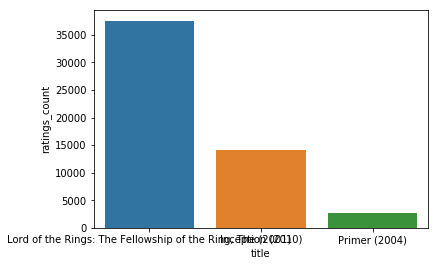

In [16]:
sns.barplot(x=sample_movies.title, 
            y=sample_movies.ratings_count)

## Long Tail

In [17]:
long_tail_data = popularity.copy()
long_tail_data = long_tail_data.sort_values('ratings_count', ascending=False)
print(long_tail_data.shape)
print(len(long_tail_data.movieId.unique()))
long_tail_data.head()

(26744, 3)
26744


,title,movieId,ratings_count
18839,Pulp Fiction (1994),296,67310
8726,Forrest Gump (1994),356,66172
20794,"Shawshank Redemption, The (1994)",318,63366
21009,"Silence of the Lambs, The (1991)",593,63299
12657,Jurassic Park (1993),480,59715


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

long_tail_plot_data = long_tail_data.sample(2000)
long_tail_plot_data = long_tail_plot_data.sort_values('ratings_count', ascending=False)


g = sns.catplot(x="title", y="ratings_count", data=long_tail_plot_data)
g.set(xticklabels=[])
plt.axvline(x=1949)
plt.show()
g.savefig("long_tail.png")

In [ ]:
#Where is the head and tail?


#How much volume is the lower 20% of all observations?
obs = long_tail_data.ratings_count.sum()
total_products = long_tail_data.shape[0]
print("{} total movies".format(total_products))
print("Total observations since 2017: {}".format(obs))
print("{} Observations make up 20% volume".format(0.2*obs))

#How many movies make up that volume?
test = long_tail_data[['ratings_count', 'title']].copy()
test.sort_values('ratings_count', inplace=True)
test = test.ratings_count.cumsum()

the_head = len(test[test>4000052])
print("{} movies make up the head".format(the_head))

the_tail = len(test[test<=4000052])
print("{} movies make up the tail".format(the_tail))

movies_in_tail = float(the_tail)/float(total_products)
print("{} percent of movies are in the tail".format(movies_in_tail))

In [ ]:
#So only 7% of our movies make up 80% of our ratings. That's pretty serious! wow!